<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span><ul class="toc-item"><li><span><a href="#Librairies" data-toc-modified-id="Librairies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Librairies</a></span></li><li><span><a href="#Fonctions" data-toc-modified-id="Fonctions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fonctions</a></span></li><li><span><a href="#Données" data-toc-modified-id="Données-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Données</a></span></li></ul></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simulation</a></span><ul class="toc-item"><li><span><a href="#Récupération-du-Temps-0-et-des-différentes-étapes-de-Temps" data-toc-modified-id="Récupération-du-Temps-0-et-des-différentes-étapes-de-Temps-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Récupération du Temps 0 et des différentes étapes de Temps</a></span></li><li><span><a href="#Tests-sur-les-données-RFM" data-toc-modified-id="Tests-sur-les-données-RFM-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tests sur les données RFM</a></span></li><li><span><a href="#Tests-sur-les-données-de-base-avec-Last_Review" data-toc-modified-id="Tests-sur-les-données-de-base-avec-Last_Review-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Tests sur les données de base avec Last_Review</a></span></li><li><span><a href="#Tests-sur-les-données-passées-au-logarithme" data-toc-modified-id="Tests-sur-les-données-passées-au-logarithme-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Tests sur les données passées au logarithme</a></span></li></ul></li></ul></div>

# Import
## Librairies

In [62]:
# Data
import pandas as pd
import numpy as np

# Maths
import math

#Date
import datetime
from datetime import timedelta

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import adjusted_rand_score

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Cluster
from sklearn.cluster import KMeans

# Warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Fonctions

## Données

In [63]:
# Récupération des données RFM
X_rfm = pd.read_csv("../Data/RFM_Data.csv", parse_dates=["Last_Order"])

X_rfm.head()

,Recency,Frequency,Monetary,Labels,Last_Order
0,160,1,141.90,0,2018-05-10
1,177,1,82.05,0,2018-04-23
2,114,1,78.42,0,2018-06-25
3,112,1,124.32,0,2018-06-27
4,70,1,92.18,0,2018-08-08


In [64]:
# Récupération des données de base
X_base = pd.read_csv("../Data/Base_data.csv", parse_dates=["Last_Order"])

X_base.head()

,Recency,Frequency,Monetary,Last_Review,Labels,Last_Order
0,160,1,141.90,5.0,3,2018-05-10
1,177,1,82.05,4.0,3,2018-04-23
2,114,1,78.42,3.0,3,2018-06-25
3,112,1,124.32,5.0,3,2018-06-27
4,70,1,92.18,5.0,3,2018-08-08


In [65]:
# Récupération des données de avec la transformation logarithmique
X_log = pd.read_csv("../Data/Log_data.csv", parse_dates=["Last_Order"])

X_log.head()

,Recency,Frequency,Monetary,Last_Review,Labels,Last_Order
0,160,0.0,4.955123,5.0,0,2018-05-10
1,177,0.0,4.407329,4.0,1,2018-04-23
2,114,0.0,4.362079,3.0,1,2018-06-25
3,112,0.0,4.822859,5.0,1,2018-06-27
4,70,0.0,4.523743,5.0,1,2018-08-08


# Simulation
## Récupération du Temps 0 et des différentes étapes de Temps

In [66]:
# Récupération de la date de la dernière commande
last_order = X_rfm["Last_Order"].max()

# Création de la date de départ du Test
first_part_date = datetime.datetime(2018,1,1)

# Calcul du nombre de semaines entre les deux dates
nb_weeks = math.ceil((last_order - first_part_date).days / 7)

# Création de la liste de toutes les dates du test
list_dates = [(first_part_date + timedelta(weeks=i)) for i in range(1, nb_weeks+1)]

## Tests sur les données RFM

In [67]:
# Initialisation du scaler et du modèle
first_rfm_std_scaler = StandardScaler()
first_rfm_kmeans = KMeans(n_clusters=4, random_state=42)

# Création de la pipeline
first_rfm_pipeline = make_pipeline(first_rfm_std_scaler, first_rfm_kmeans)

# Récupération des données à la date de départ
orginal_rfm_data = X_rfm.loc[X_rfm["Last_Order"]<=first_part_date, ["Recency", "Frequency", "Monetary"]]

# Entrainement du modèle
first_rfm_pipeline.fit(orginal_rfm_data)

# Récupération des labels originaux
original_rfm_labels = first_rfm_pipeline["kmeans"].labels_

# Initialisation de la liste des scores
list_rfm_ari = []

# Boucle sur toutes les dates à tester
for date in list_dates:
    
    # Récupération des données tests
    rfm_df = X_rfm.loc[X_rfm["Last_Order"]<=date, ["Recency", "Frequency", "Monetary"]]
    
    #Initialisation du scaler et du modèle
    test_rfm_std_scaler = StandardScaler()
    test_rfm_kmeans = KMeans(n_clusters=4, random_state=42)
    
    # Création de la pipeline
    test_rfm_pipeline = make_pipeline(test_rfm_std_scaler, test_rfm_kmeans)
    
    # Entrainement du modèle
    test_rfm_pipeline.fit(rfm_df)
    
    # Récupération des nouveaux labels
    test_rfm_labels = test_rfm_pipeline.predict(orginal_rfm_data)
    
    # Calcul du score de l'indice de Rand
    score_rfm_ari = adjusted_rand_score(original_rfm_labels, test_rfm_labels)
    
    # Ajout du score à la liste avec la date
    list_rfm_ari.append([date, score_rfm_ari])

In [68]:
# Création du DataFrame des scores
ari_rfm_df = pd.DataFrame(list_rfm_ari, columns=["Order_Date", "Score ARI"])
ari_rfm_df.head()

,Order_Date,Score ARI
0,2018-01-08,0.945860
1,2018-01-15,0.894464
2,2018-01-22,0.844600
3,2018-01-29,0.810887
4,2018-02-05,0.755255


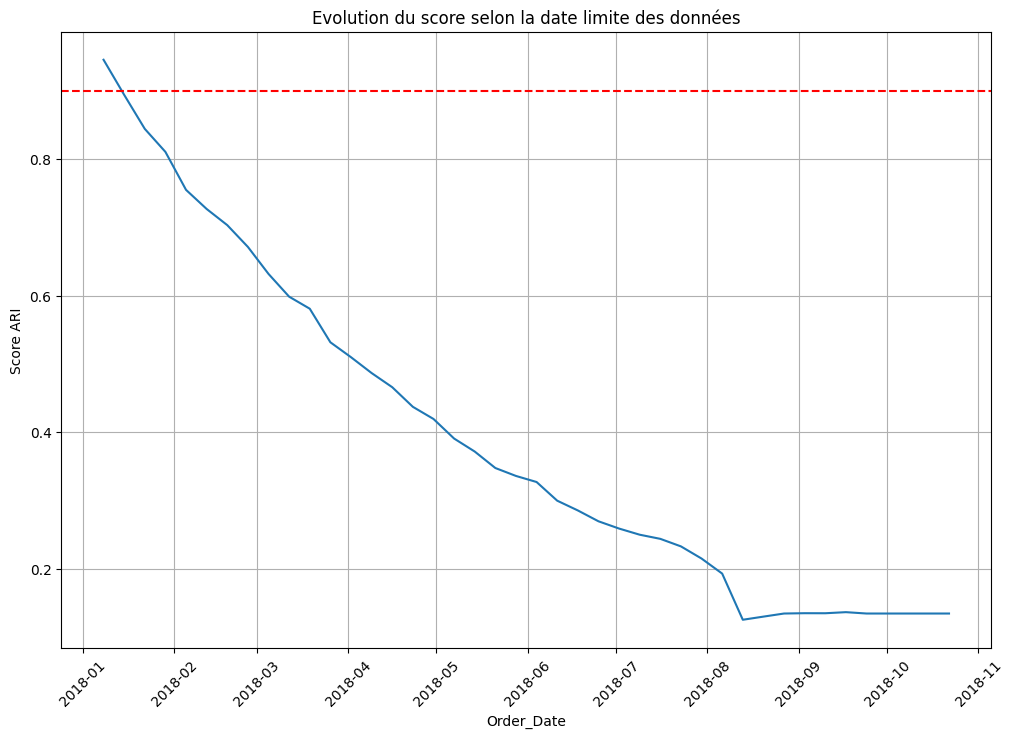

In [86]:
# Affichage du graphique des scores en fonction de la date
plt.figure(figsize=(12,8))
sns.lineplot(ari_rfm_df.set_index("Order_Date"), legend=False)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel("Score ARI")
plt.title("Evolution du score selon la date limite des données")
plt.grid(True)
plt.show()

In [70]:
# Récupération de l'index où le score descend en dessous du palier de 0.9
index_ari = ari_rfm_df.loc[ari_rfm_df["Score ARI"]<0.9].index[0]

# Récupération de la date limite
limit_date = ari_rfm_df.loc[index_ari, "Order_Date"]

# Calcul du nombre de jours avant de devoir réentrainer le modèle
days_maj = limit_date - first_part_date
days_maj

Timedelta('14 days 00:00:00')

## Tests sur les données de base avec Last_Review

In [71]:
# Initialisation du scaler et du modèle
first_base_std_scaler = StandardScaler()
first_base_kmeans = KMeans(n_clusters=5, random_state=42)

# Création de la pipeline
first_base_pipeline = make_pipeline(first_base_std_scaler, first_base_kmeans)

# Récupération des données à la date de départ
orginal_base_data = X_base.loc[X_base["Last_Order"]<=first_part_date, ["Recency", "Frequency", "Monetary", "Last_Review"]]

# Entrainement du modèle
first_base_pipeline.fit(orginal_base_data)

# Récupération des labels originaux
original_base_labels = first_base_pipeline["kmeans"].labels_

# Initialisation de la liste des scores
list_base_ari = []

# Boucle sur toutes les dates à tester
for date in list_dates:
    
    # Récupération des données tests
    base_df = X_base.loc[X_base["Last_Order"]<=date, ["Recency", "Frequency", "Monetary", "Last_Review"]]
    
    #Initialisation du scaler et du modèle
    test_base_std_scaler = StandardScaler()
    test_base_kmeans = KMeans(n_clusters=5, random_state=42)
    
    # Création de la pipeline
    test_base_pipeline = make_pipeline(test_base_std_scaler, test_base_kmeans)
    
    # Entrainement du modèle
    test_base_pipeline.fit(base_df)
    
    # Récupération des nouveaux labels
    test_base_labels = test_base_pipeline.predict(orginal_base_data)
    
    # Calcul du score de l'indice de Rand
    score_base_ari = adjusted_rand_score(original_base_labels, test_base_labels)
    
    # Ajout du score à la liste avec la date
    list_base_ari.append([date, score_base_ari])

In [72]:
# Création du DataFrame des scores
ari_base_df = pd.DataFrame(list_base_ari, columns=["Order_Date", "Score ARI"])
ari_base_df.head()

,Order_Date,Score ARI
0,2018-01-08,0.957891
1,2018-01-15,0.914365
2,2018-01-22,0.867064
3,2018-01-29,0.833651
4,2018-02-05,0.794111


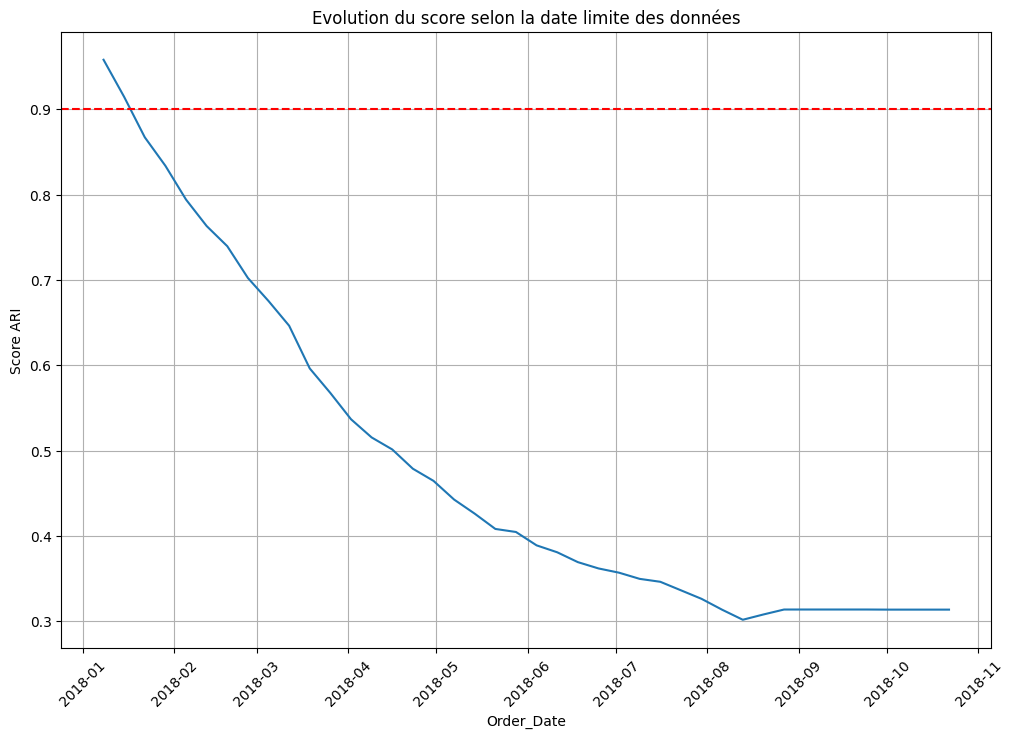

In [85]:
# Affichage du graphique des scores en fonction de la date
plt.figure(figsize=(12,8))
sns.lineplot(ari_base_df.set_index("Order_Date"), legend=False)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel("Score ARI")
plt.title("Evolution du score selon la date limite des données")
plt.grid(True)
plt.show()

In [74]:
# Récupération de l'index où le score descend en dessous du palier de 0.9
index_ari = ari_base_df.loc[ari_base_df["Score ARI"]<0.9].index[0]

# Récupération de la date limite
limit_date = ari_base_df.loc[index_ari, "Order_Date"]

# Calcul du nombre de jours avant de devoir réentrainer le modèle
days_maj = limit_date - first_part_date
days_maj

Timedelta('21 days 00:00:00')

## Tests sur les données passées au logarithme

In [75]:
# Initialisation du scaler et du modèle
first_log_std_scaler = StandardScaler()
first_log_kmeans = KMeans(n_clusters=5, random_state=42)

# Création de la pipeline
first_log_pipeline = make_pipeline(first_log_std_scaler, first_log_kmeans)

# Récupération des données à la date de départ
orginal_log_data = X_log.loc[X_log["Last_Order"]<=first_part_date, ["Recency", "Frequency", "Monetary", "Last_Review"]]

# Entrainement du modèle
first_log_pipeline.fit(orginal_log_data)

# Récupération des labels originaux
original_log_labels = first_log_pipeline["kmeans"].labels_

# Initialisation de la liste des scores  
list_log_ari = []

# Boucle sur toutes les dates à tester
for date in list_dates:
    
    # Récupération des données tests
    log_df = X_log.loc[X_log["Last_Order"]<=date, ["Recency", "Frequency", "Monetary", "Last_Review"]]
    
    #Initialisation du scaler et du modèle
    test_log_std_scaler = StandardScaler()
    test_log_kmeans = KMeans(n_clusters=5, random_state=42)
    
    # Création de la pipeline
    test_log_pipeline = make_pipeline(test_log_std_scaler, test_log_kmeans)
    
    # Entrainement du modèle
    test_log_pipeline.fit(log_df)
    
    # Récupération des nouveaux labels
    test_log_labels = test_log_pipeline.predict(orginal_log_data)
    
    # Calcul du score de l'indice de Rand
    score_log_ari = adjusted_rand_score(original_log_labels, test_log_labels)
    
    # Ajout du score à la liste avec la date
    list_log_ari.append([date, score_log_ari])

In [76]:
# Création du DataFrame des scores
ari_log_df = pd.DataFrame(list_log_ari, columns=["Order_Date", "Score ARI"])
ari_log_df.head()

,Order_Date,Score ARI
0,2018-01-08,0.935322
1,2018-01-15,0.913458
2,2018-01-22,0.869536
3,2018-01-29,0.821171
4,2018-02-05,0.785914


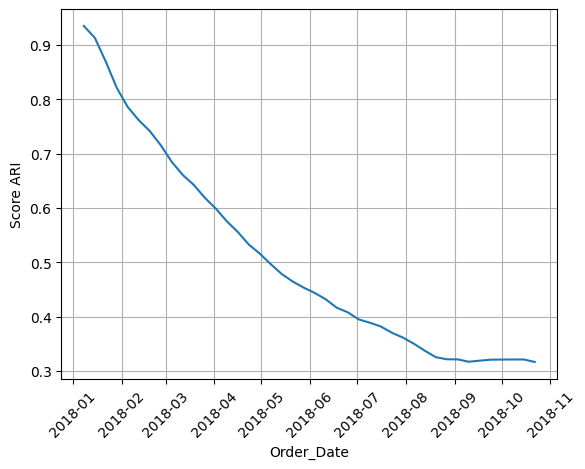

In [77]:
# Affichage du graphique des scores en fonction de la date
sns.lineplot(ari_log_df.set_index("Order_Date"), legend=False)
plt.xticks(rotation=45)
plt.ylabel("Score ARI")
plt.grid(True)
plt.show()

In [78]:
# Récupération de l'index où le score descend en dessous du palier de 0.9
index_log_ari = ari_log_df.loc[ari_log_df["Score ARI"]<0.9].index[0]

# Récupération de la date limite
limit_log_date = ari_log_df.loc[index_log_ari, "Order_Date"]

# Calcul du nombre de jours avant de devoir réentrainer le modèle
days_maj = limit_log_date - first_part_date
days_maj

Timedelta('21 days 00:00:00')